In [2]:
import cluster_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

load graph (This is a default example, you can change to the graph you want)

In [ ]:
G = nx.karate_club_graph()

The initial cluster<br>
In this example, we use the default initial cluster

In [ ]:
initial_cluster = {}
for i, v in enumerate(G.nodes()):
    initial_cluster[v] = i

compute the best leveled cluster: best_leveled_cluster is the final clustering result

In [ ]:
l_cluster = cluster_louvain.best_leveled_cluster(G, initial_cluster)
l_cluster[node] #each node belongs to which cluster

draw the graph

In [ ]:
pos = nx.spring_layout(G)

color the nodes according to their leveled cluster

In [ ]:
cmap = cm.get_cmap('viridis', max(l_cluster.values()) + 1)
nx.draw_networkx_nodes(G, pos, l_cluster.keys(), node_size=40, 
                       cmap=cmap, node_color=list(l_cluster.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Demo1: print best_leveled_cluster i.e., final clustering results

In [4]:
#DEMO 1
G = nx.karate_club_graph()
print('best_leveled_cluster')
cluster_result=cluster_louvain.best_leveled_cluster(G)
print(cluster_result)

best_leveled_cluster
{0: 1, 1: 1, 2: 1, 3: 1, 4: 3, 5: 3, 6: 3, 7: 1, 8: 0, 9: 1, 10: 3, 11: 1, 12: 1, 13: 1, 14: 0, 15: 0, 16: 3, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 2, 24: 2, 25: 2, 26: 0, 27: 2, 28: 2, 29: 0, 30: 0, 31: 2, 32: 0, 33: 0}


Demo 2: print best_leveled_cluster twice to show the final clustering results.
Since the Louvain algorithm is a randomized algorithm, it starts from different nodes to do classification; therefore, we will get different final results in different trails.

In [70]:
#DEMO 2
G=nx.erdos_renyi_graph(150, 0.01)
#randomized algorithm, so the final clustering results may be different in diffrernt trials.
print('\n1st trial')
print(cluster_louvain.best_leveled_cluster(G))
print('\n2nd trial')
print(cluster_louvain.best_leveled_cluster(G))



1st trial
{0: 0, 1: 1, 2: 0, 3: 2, 4: 3, 5: 4, 6: 5, 7: 2, 8: 5, 9: 6, 10: 4, 11: 3, 12: 2, 13: 9, 14: 10, 15: 28, 16: 2, 17: 2, 18: 12, 19: 13, 20: 4, 21: 14, 22: 4, 23: 15, 24: 15, 25: 17, 26: 2, 27: 28, 28: 0, 29: 0, 30: 15, 31: 18, 32: 19, 33: 15, 34: 5, 35: 20, 36: 21, 37: 13, 38: 5, 39: 10, 40: 17, 41: 17, 42: 23, 43: 2, 44: 4, 45: 0, 46: 15, 47: 15, 48: 4, 49: 17, 50: 0, 51: 13, 52: 2, 53: 17, 54: 4, 55: 2, 56: 3, 57: 5, 58: 4, 59: 24, 60: 5, 61: 25, 62: 26, 63: 28, 64: 12, 65: 4, 66: 27, 67: 10, 68: 28, 69: 5, 70: 2, 71: 17, 72: 10, 73: 2, 74: 0, 75: 2, 76: 28, 77: 29, 78: 28, 79: 17, 80: 30, 81: 15, 82: 0, 83: 17, 84: 17, 85: 4, 86: 31, 87: 5, 88: 2, 89: 4, 90: 15, 91: 21, 92: 28, 93: 15, 94: 3, 95: 32, 96: 28, 97: 10, 98: 33, 99: 4, 100: 15, 101: 20, 102: 3, 103: 34, 104: 10, 105: 35, 106: 36, 107: 32, 108: 37, 109: 28, 110: 15, 111: 4, 112: 0, 113: 10, 114: 0, 115: 38, 116: 4, 117: 2, 118: 0, 119: 7, 120: 0, 121: 0, 122: 10, 123: 15, 124: 33, 125: 3, 126: 4, 127: 3, 128: 18

Demo 3: print cluster at the given level and show derandomization
Note: this Demo disable the randomized parameter, so the final outputs of different trials will be certainly the same.

We print the whole clustifying history i.e., each result at each layer.
First, we print out every clustering result at its current level by calling 'leveled_cluster(dendrogram, level)' function in a for loop.
Then, we see the final leve 'leveled_cluster(dendrogram, len(dendrogram))' is exactly the best_leveled_cluster.

Finally, print best_leveled_cluster twicw are still maintain the same since we set randomize=False.

In [72]:
#DEMO 3
G=nx.erdos_renyi_graph(100, 0.01)
#If it shouldn't randomize, we set a fixed seed to get determinisitc results.
dendrogram = cluster_louvain.generate_dendrogram(G,randomize=False)
print('dendogram length=',len(dendrogram))
for level in range(len(dendrogram)) :
    print("\n cluster at given level: level", level, "is\n", cluster_louvain.leveled_cluster(dendrogram, level))
print('\n best_leveled_cluster, should be the same as the final level')
print(cluster_louvain.best_leveled_cluster(G,randomize=False))
print('\n best_leveled_cluster, should be the same as above')
print(cluster_louvain.best_leveled_cluster(G,randomize=False))

dendogram length= 3

 cluster at given level: level 0 is
 {0: 0, 1: 1, 2: 54, 3: 3, 4: 4, 5: 5, 6: 42, 7: 7, 8: 8, 9: 41, 10: 10, 11: 10, 12: 12, 13: 7, 14: 29, 15: 15, 16: 29, 17: 17, 18: 18, 19: 15, 20: 20, 21: 21, 22: 45, 23: 31, 24: 11, 25: 25, 26: 13, 27: 48, 28: 14, 29: 12, 30: 22, 31: 31, 32: 32, 33: 15, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 47, 47: 47, 48: 20, 49: 49, 50: 19, 51: 1, 52: 52, 53: 53, 54: 18, 55: 27, 56: 39, 57: 57, 58: 58, 59: 59, 60: 39, 61: 36, 62: 2, 63: 6, 64: 48, 65: 9, 66: 31, 67: 11, 68: 13, 69: 14, 70: 16, 71: 5, 72: 19, 73: 48, 74: 22, 75: 52, 76: 44, 77: 23, 78: 41, 79: 26, 80: 24, 81: 26, 82: 27, 83: 28, 84: 29, 85: 30, 86: 33, 87: 46, 88: 41, 89: 48, 90: 50, 91: 51, 92: 47, 93: 9, 94: 54, 95: 55, 96: 56, 97: 54, 98: 11, 99: 60}

 cluster at given level: level 1 is
 {0: 0, 1: 6, 2: 2, 3: 3, 4: 4, 5: 22, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 10, 12: 11, 13: 7, 14: 50, 15: 50, 16: 50, 17: 14, 18

Demo 4: visualization of each leveled_cluster


level: 0


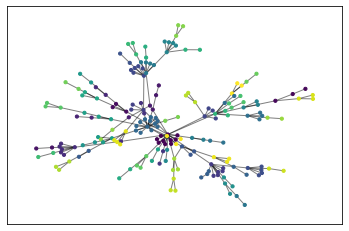

level: 1


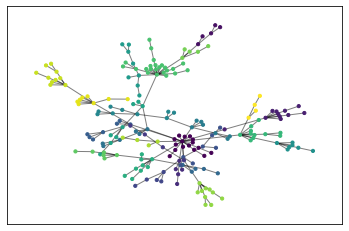

level: 2


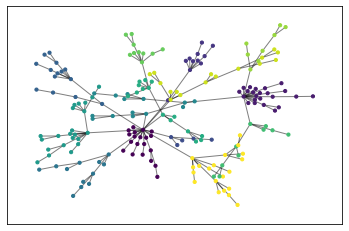

In [75]:
#DEMO 4
#G=nx.erdos_renyi_graph(100, 0.015)
G=nx.barabasi_albert_graph(n=200, m=1)
dendrogram = cluster_louvain.generate_dendrogram(G)
for level in range(len(dendrogram)) :
    print('level:', level)
    plt.figure(level)
    pos = nx.spring_layout(G)
    l_cluster = cluster_louvain.leveled_cluster(dendrogram, level)
    cmap = cm.get_cmap('viridis', max(l_cluster.values()) + 1)
    nx.draw_networkx_nodes(G, pos, l_cluster.keys(), node_size=10, 
                           cmap=cmap, node_color=list(l_cluster.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()